# autoMI with Markov Model
This notebook generates a Markov model and looks at its autocorrelation and autoMI.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import mlab
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import tqdm

## Create markov model and sample sequences

In [3]:
def gen_seq_markov(alphabet, probs, seq_len):
    """ Generate a set of sample sequences from a Markov model
    """
    sequence = list(
        np.random.choice(alphabet, p=np.sum(probs, axis=0) / np.sum(probs), size=1)
    )
    for i in tqdm(range(seq_len-1)):
        sequence.append(np.random.choice(alphabet, p=probs[:, sequence[-1]], size=1)[0])
    return sequence

In [4]:
probs = np.array([[0.1, 0.9], [0.9, 0.1]])
alphabet = [0, 1]

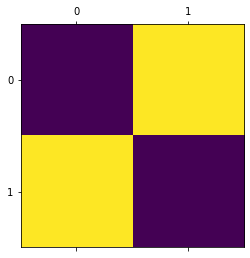

In [5]:
plt.matshow(probs)

In [6]:
sequence = gen_seq_markov(alphabet, probs, seq_len = 100000)

  0%|          | 0/99999 [00:00<?, ?it/s]

In [7]:
print(len(sequence), sequence[:10])

100000 [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


### Autocorrelation
First, lets look at the autocorrelation between the sequences

In [8]:
from tqdm.auto import tqdm
def autocorrelate(y, range_ = range(1,100)):
    return [np.corrcoef(y[i:], y[:-i])[0][1] for i in tqdm(range_)]

In [9]:
range_ = np.arange(1,100)

In [10]:
# compute autocorrelation over the range of lags
autocorr = autocorrelate(sequence, range_)

  0%|          | 0/99 [00:00<?, ?it/s]

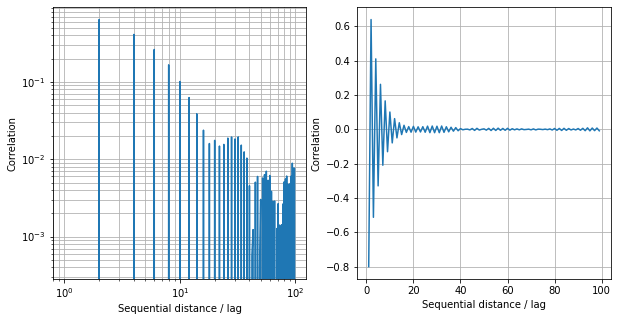

In [11]:
# plot the autocorrelation in log-log and linear
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, autocorr)
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('Correlation')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, autocorr)
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('Correlation')
ax.grid(which='both')

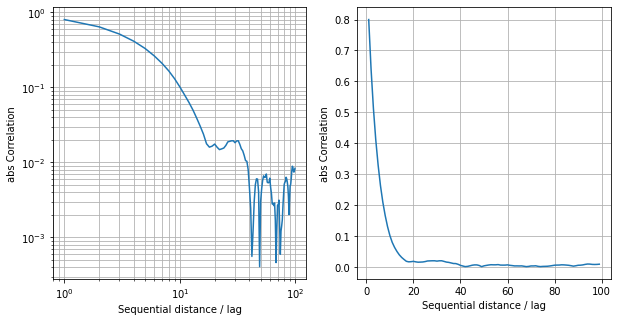

In [12]:
# plot the absolute value of the autocorrelation in log-log and linear
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, np.abs(autocorr))
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('abs Correlation')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, np.abs(autocorr))
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('abs Correlation')
ax.grid(which='both')

### Now, lets look at the AutoMI

In [13]:
from automi import sequential_mutual_information as smi

(MI, _), (shuff_MI, _) = smi(
    [sequence], distances=range_
)

  0%|          | 0/99 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    1.2s finished


  0%|          | 0/99 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    0.3s finished


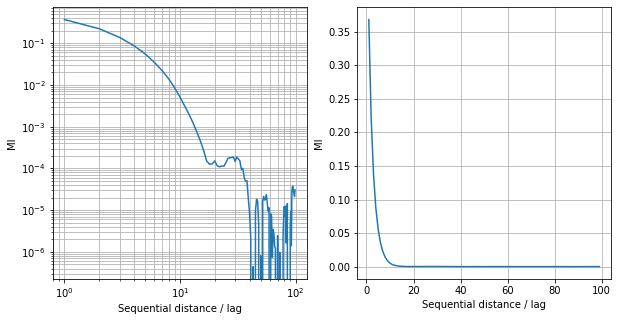

In [14]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, MI - shuff_MI)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('MI')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, MI - shuff_MI)
ax.set_xlabel('MI')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')


## A more complex markov model

In [41]:
probs = np.random.sample((10,10))**10
probs = probs / np.sum(probs, axis=0)
alphabet = np.arange(len(probs))

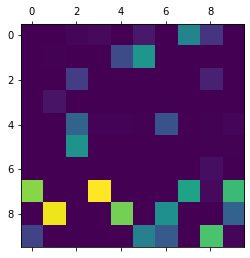

In [42]:
plt.matshow(probs)

In [43]:
sequence = gen_seq_markov(alphabet, probs, seq_len = 100000)

  0%|          | 0/99999 [00:00<?, ?it/s]

In [44]:
print(len(sequence), sequence[:10])

100000 [2, 4, 8, 9, 7, 0, 7, 7, 7, 0]


In [45]:
# compute autocorrelation over the range of lags
autocorr = autocorrelate(sequence, range_)

  0%|          | 0/99 [00:00<?, ?it/s]

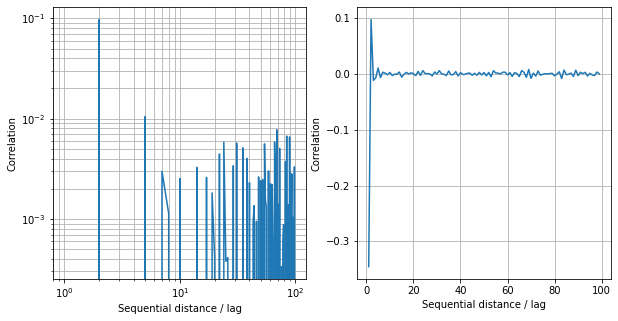

In [46]:
# plot the autocorrelation in log-log and linear
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, autocorr)
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('Correlation')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, autocorr)
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('Correlation')
ax.grid(which='both')

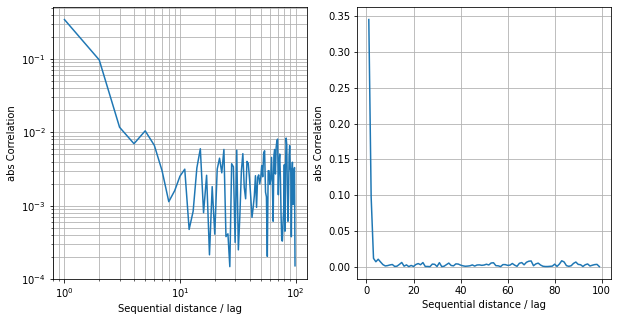

In [47]:
# plot the absolute value of the autocorrelation in log-log and linear
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, np.abs(autocorr))
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('abs Correlation')
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, np.abs(autocorr))
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('abs Correlation')
ax.grid(which='both')

### Now, lets look at the AutoMI

In [48]:
from automi import sequential_mutual_information as smi

(MI, _), (shuff_MI, _) = smi(
    [sequence], distances=range_
)

  0%|          | 0/99 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    0.3s finished


  0%|          | 0/99 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  84 out of  99 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  99 out of  99 | elapsed:    0.3s finished


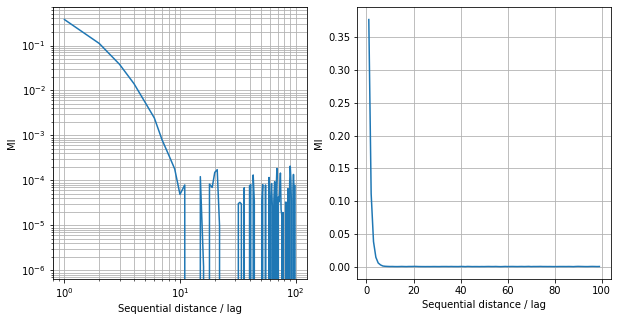

In [49]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
ax = axs[0]
ax.plot(range_, MI - shuff_MI)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('MI')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')

ax = axs[1]
ax.plot(range_, MI - shuff_MI)
ax.set_xlabel('MI')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')


### Fitting a decay model

In [54]:
from automi import fit_model

In [55]:
decay_model, model_y = fit_model(
    distances = range_,
    sig = MI - shuff_MI,
    decay_function = "exponential"
)
decay_model

/n/groups/datta/tim_sainburg/projects/automi/automi/modelfitting/fit.py:118: RuntimeWarning: invalid value encountered in log
  return np.abs(np.log(y_true) - np.log(y_model)) * (1 / (np.log(1 + x)))


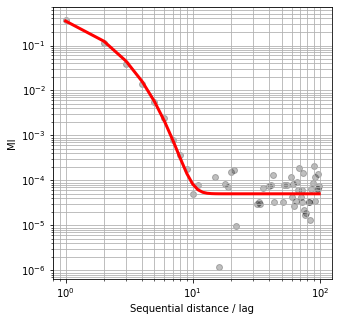

In [57]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.scatter(range_, MI - shuff_MI, color = 'k', alpha = 0.25)

ax.plot(range_, model_y, lw=3, color = 'red')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')

### Linear fit
note that above, values below 0 cannot be fit using the default log residuals

In [61]:
decay_model, model_y = fit_model(
    distances = range_,
    sig = MI - shuff_MI,
    decay_function = "exponential",
    fit_scale = "linear"
)
decay_model

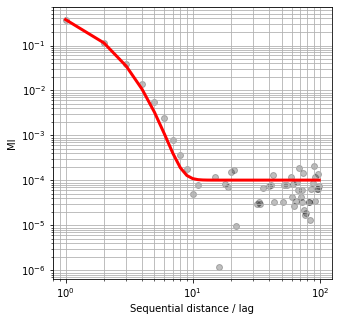

In [62]:
fig, ax = plt.subplots(ncols=1, figsize=(5,5))
ax.scatter(range_, MI - shuff_MI, color = 'k', alpha = 0.25)

ax.plot(range_, model_y, lw=3, color = 'red')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Sequential distance / lag')
ax.set_ylabel('MI')
ax.grid(which='both')